# Data preparation

In [1]:
# Download dataset
#!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

In [57]:
# Import liberaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split

In [58]:
# Import dataset and select req columns
selected_columns = ['Make', 'Model', 'Year', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']
data = pd.read_csv('data.csv', usecols=selected_columns)

In [59]:
data.head(10)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
5,BMW,1 Series,2012,230.0,6.0,MANUAL,Coupe,28,18,31200
6,BMW,1 Series,2012,300.0,6.0,MANUAL,Convertible,26,17,44100
7,BMW,1 Series,2012,300.0,6.0,MANUAL,Coupe,28,20,39300
8,BMW,1 Series,2012,230.0,6.0,MANUAL,Convertible,28,18,36900
9,BMW,1 Series,2013,230.0,6.0,MANUAL,Convertible,27,18,37200


In [60]:
data.shape

(11914, 10)

In [61]:
# Rename columns
data.columns = data.columns.str.replace(' ', '_').str.lower()
data.rename(columns={'msrp':'price'}, inplace = True)

In [62]:
# Fill missing values with 0 
data.fillna(0, inplace = True)
data.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
dtype: int64

In [63]:
data.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
price                  int64
dtype: object

# Question 1 

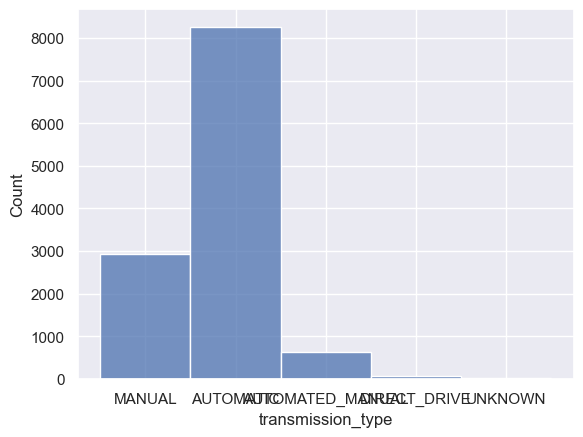

In [64]:
sns.histplot(data=data, x='transmission_type', binwidth=10)
sns.set(font_scale=1.0)

In [65]:
# Answer: automatic

# Question 2

In [66]:
data.corr()

/var/folders/0_/6v10ch9x3r36n7qwk4kmwfbc0000gn/T/ipykernel_67784/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
year,1.000000,0.338714,-0.040708,0.258240,0.198171,0.227590
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918,0.650095
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306,0.526274
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829,-0.160043
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000,-0.157676
price,0.227590,0.650095,0.526274,-0.160043,-0.157676,1.000000


In [68]:
# Answer: highway_mpg and city_mpg

In [69]:
# Make price binary
avg_price = data.price.mean()
data['above_average'] = data['price'].apply(lambda x: 1 if x > avg_price else 0)

In [70]:
# Show final_ds
data.head(3)

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0


In [71]:
# Split the data
from sklearn.model_selection import train_test_split
data.columns
required_columns = ['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
        'above_average']
# Exclude "price" columns from ds
data_to_split = data[required_columns]
# Use train_test_split
df_full_train, df_test = train_test_split(data_to_split, test_size = 0.2, random_state = 1)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)

In [72]:
len(df_val)+ len(df_train) + len(df_test), len(data_to_split)

(11914, 11914)

In [73]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [74]:
y_train = df_train.above_average.values
y_test = df_test.above_average.values
y_val = df_val.above_average.values

In [75]:
del df_train['above_average']
del df_test['above_average']
del df_val['above_average']

# Question 3

In [76]:
from sklearn.metrics import mutual_info_score as mis

In [77]:
# Calcualte mutual information between abv average and cat var
categorical_columns = list(df_train.dtypes[df_train.dtypes == 'object'].index)
for cat in categorical_columns:
    print(cat, round(mis(df_train[cat], y_train),2))

make 0.24
model 0.47
transmission_type 0.02
vehicle_style 0.08


In [78]:
# Answer transimssion_type 

# Question 4

In [79]:
# One hot encoding
from sklearn.feature_extraction import DictVectorizer

In [80]:
train_dicts = df_train.to_dict(orient= 'records')

In [81]:
dv = DictVectorizer(sparse= False)

In [82]:
X_train = dv.fit_transform(train_dicts)

In [83]:
val_dicts = df_val.to_dict(orient='records')

In [84]:
X_val = dv.transform(val_dicts)

In [85]:
# Train logistic regression
from sklearn.linear_model import LogisticRegression

In [86]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [87]:
model.intercept_

array([-0.20411973])

In [88]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.7200955 , 0.00234169, 0.23457303, ..., 0.00247747, 0.99999685,
       0.04527312])

In [89]:
above_decision = (y_pred >= 0.5)

In [90]:
above_decision

array([ True, False, False, ..., False,  True, False])

In [91]:
full_score = round((y_val == above_decision).mean(),2)
full_score

0.94

In [37]:
# Answer 0.95

# Question 5 

In [92]:
# Names of df_train df_val df_test
# Feature eliminations
dicts_score = {}
all_columns = df_train.columns
for column in all_columns:
    temp = list(df_train.columns)
    # List with columns,  excluding each feature
    columns_temp = [el for el in temp if el != column]
    # Create model as in the previous question
    train_dicts = df_train[columns_temp].to_dict(orient= 'records')
    dv = DictVectorizer(sparse= False)
    X_train = dv.fit_transform(train_dicts)
    val_dicts = df_val[columns_temp].to_dict(orient='records')
    X_val = dv.transform(val_dicts)
    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:,1]
    above_decision = (y_pred >= 0.5)
    score = round((y_val == above_decision).mean(),5)
    dicts_score[column] = score

dicts_score

{'make': 0.94503,
 'model': 0.91523,
 'year': 0.9509,
 'engine_hp': 0.93286,
 'engine_cylinders': 0.94041,
 'transmission_type': 0.94713,
 'vehicle_style': 0.94125,
 'highway_mpg': 0.93957,
 'city_mpg': 0.93663}

In [93]:
diff_score = {}
for k, v in dicts_score.items():
    diff_score[k] = abs(round(v - full_score,3))

In [94]:
sorted(diff_score.items(), key=lambda x: x[1])

[('engine_cylinders', 0.0),
 ('highway_mpg', 0.0),
 ('vehicle_style', 0.001),
 ('city_mpg', 0.003),
 ('make', 0.005),
 ('engine_hp', 0.007),
 ('transmission_type', 0.007),
 ('year', 0.011),
 ('model', 0.025)]

In [138]:
# Answer: city_mpg

# Question 6

In [95]:
data_lr = data.copy()
del data_lr['above_average']

In [96]:
data_lr['price']=np.log1p(data_lr['price'])
data_lr.head(3)

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,10.739349
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,10.612779
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,10.500977


In [97]:
df_train_full, df_test = train_test_split(data_lr, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [98]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [99]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

In [101]:
del df_train['price']
del df_val['price']
del df_test['price']

KeyError: 'price'

In [53]:
# Ridge Regression

In [54]:
train_dict = df_train.to_dict(orient='records')

In [104]:
#@ VECTORIZING THE DATASET:
dv = DictVectorizer(sparse=True)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [105]:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, round(score, 4))

0 0.2512
0.01 0.2549
0.1 0.255
1 0.2583
10 0.336


In [ ]:
# Answer: 0